<img src="header.png" align="left"/>

# Anwendungsbeispiel Dimensionality reduction and clustering


Das Ziel dieses Beispiels ist die Erklärung von **dimensionality reduction** und **clustering**. Dabei wird versucht die hochdimensionalen MNIST Daten auf die wesentlichen Dimensionen zu reduzieren und dann ein Clustering durchzuführen. Danach wird ein Vergleich der gefundenen Cluster mit den vorhandenen Labels durchgeführt.

Der Code für das Beispiel wurde aus [1] entlehnt, die Daten stammen von [2].

- [1] [https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)
- [2] [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)




# Import der Module  

In [1]:
#
# Importieren der Module
#
from keras.datasets import mnist

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Using TensorFlow backend.


In [2]:
#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

In [3]:
#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 10]

# Laden der Daten

In [13]:
#
# Laden der Beispieldaten (hier sehr vereinfacht) und gleichzeitige Aufteilung in Trainings- und Testdaten
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
#
# Anzeige der Anzahl und Form der Samples
#
print('Trainingsdaten: X=%s, y=%s' % (x_train.shape, y_train.shape))

Trainingsdaten: X=(60000, 28, 28), y=(60000,)


In [15]:
# 
# Ändere die Matrixform der Daten
#
x_train = x_train.reshape((x_train.shape[0], 784 ))

In [16]:
# 
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
#
x_train = x_train.astype('float32')
x_train = x_train / 255.0

In [27]:
#
# Anlegen der Featurenamen
#
feat_cols = [ 'pixel'+str(i) for i in range(x_train.shape[1]) ]
print(feat_cols)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [18]:
#
# Anlegen des Dataframe
#
df = pd.DataFrame(x_train,columns=feat_cols)

In [19]:
#
# Anlegen der Labels
#
df['y'] = y_train
df['label'] = df['y'].apply(lambda i: str(i))

In [21]:
#
# Check
#
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (60000, 786)


In [22]:
#
# Kurzer Check
#
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [23]:
# 
# Anlegen einer Permutation (zufälligen Mischung) 
#
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
print(rndperm)

[12628 37730 39991 ...   860 15795 56422]


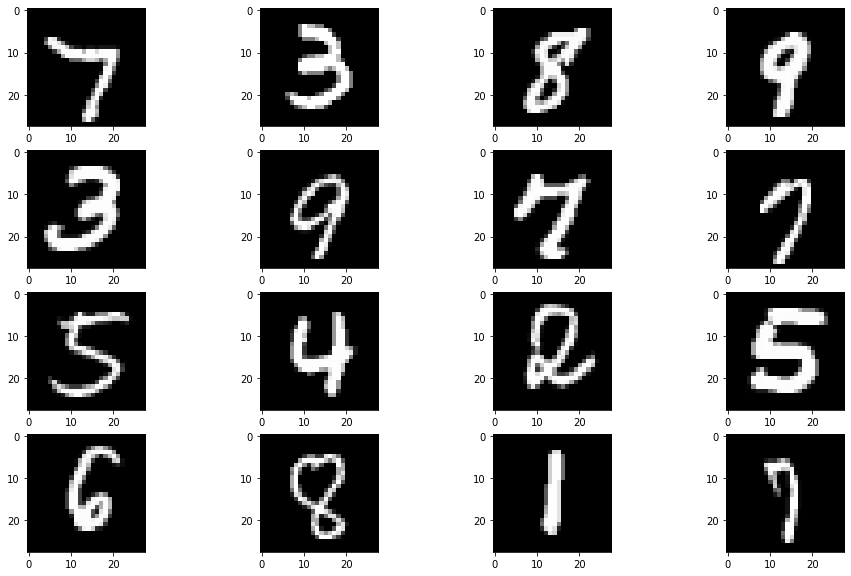

In [24]:
#
# Anzeige von Beispielen der Daten
#
for i in range(16):
    plt.subplot(4,4,1 + i)
    plt.imshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float), cmap=plt.get_cmap('gray'))
plt.show()

# Principal component analysis

In [38]:
#
# Anlegen der PCA Klasse
#
pca = PCA(n_components=4)

In [39]:
#
# Trainieren der PCA Klasse
#
pca_result = pca.fit_transform(df[feat_cols].values)

In [40]:
pca_result.shape

(60000, 4)

In [43]:
pca_result[1]

array([ 3.967527 , -1.1562622,  2.3386338, -1.8071023], dtype=float32)

In [44]:
pca_result[4]

array([-1.5009934 ,  2.864946  ,  0.06411564, -0.9480739 ], dtype=float32)

In [45]:
#
# Speichern der Resultate und Bestimmung der Varianz der Reduktion
#
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Variation bestimmt durch die principal components: {}'.format(pca.explained_variance_ratio_))

Variation bestimmt durch die principal components: [0.09704661 0.07095923 0.06169083 0.05389418]


# Plot der PCA Daten

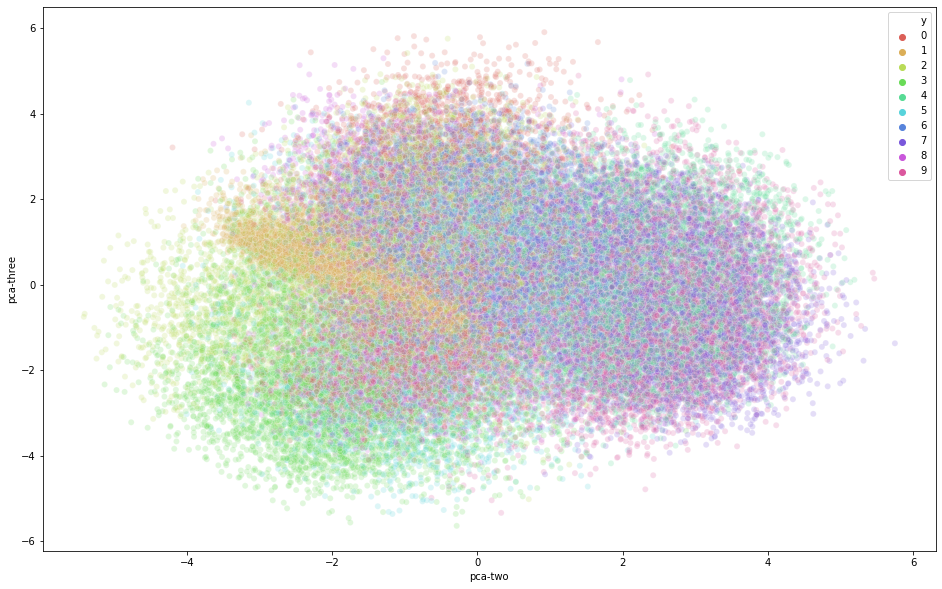

In [49]:
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.2
)

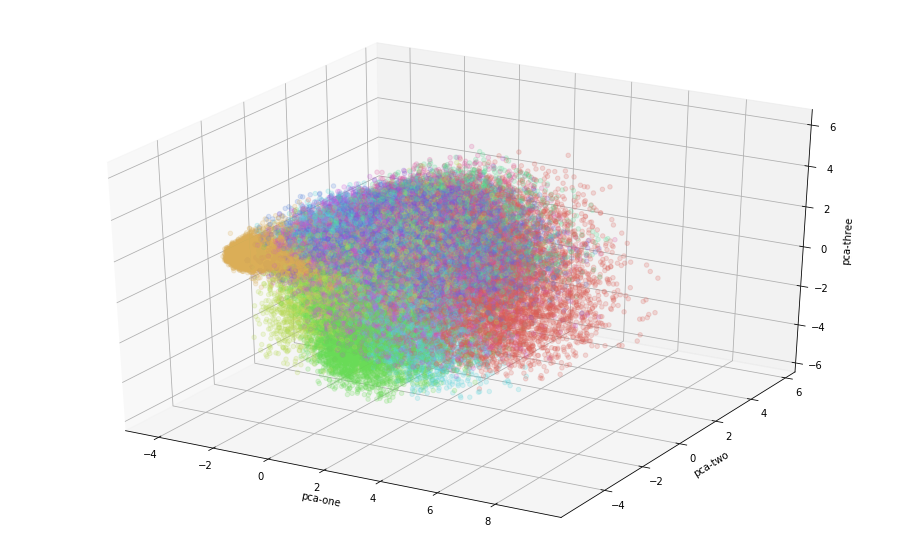

In [50]:
#
# 3D plot der gleichen PCA
#
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("hls", 10))

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap=cmap, alpha=0.2
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [51]:
#
# Reduktion der Daten auf ein Subset von 10000 Samples
# um die Rechendauer zu beschränken
#
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [52]:
#
# Nochmals PCA auf die reduzierten Daten (für Vergleich später)
#
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

# t-SNE


Eine gute Beschreibung des Algorithmus ist hier zu finden: [https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/).

In [53]:
#
# Reduktion mit t-sne auf 2 Dimensionen
#
tsne = TSNE(n_components=2, verbose=1, n_iter=3000, perplexity=30, early_exaggeration=12)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.168s...
[t-SNE] Computed neighbors for 10000 samples in 118.927s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.039168
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.598587
[t-SNE] KL divergence after 3000 iterations: 1.759767


In [55]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
# df_subset['tsne-2d-three'] = tsne_results[:,2]



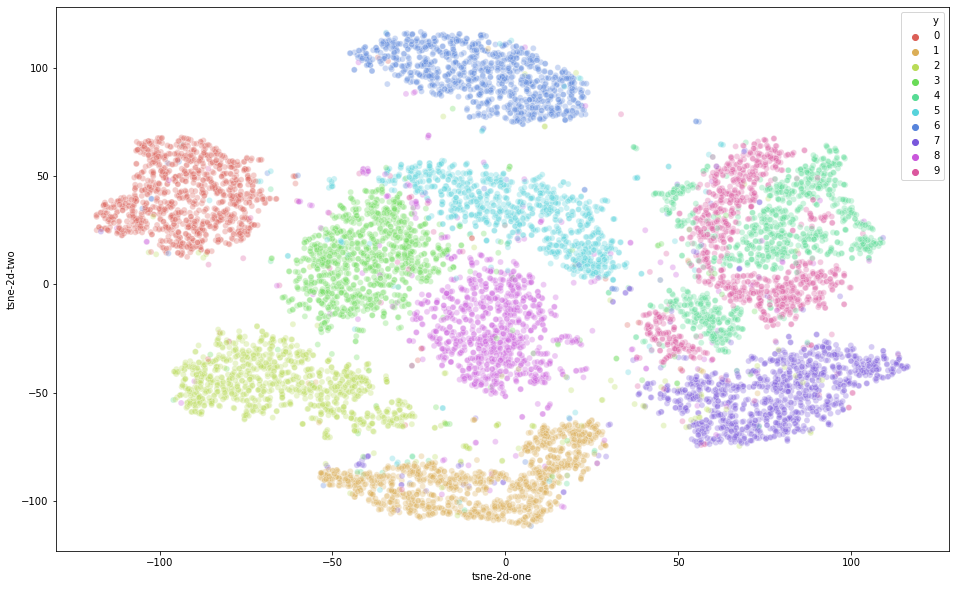

In [56]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

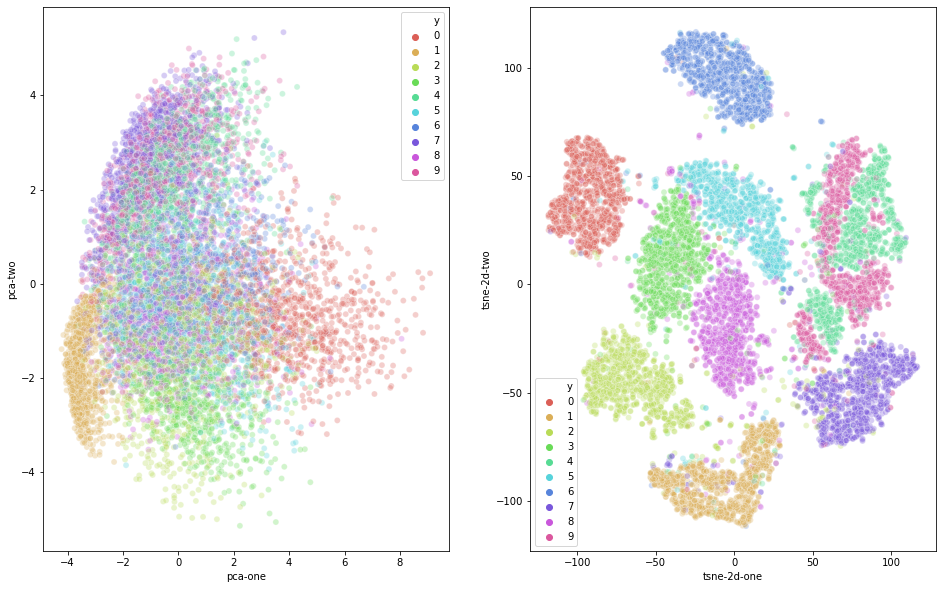

In [57]:
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# Hinweis

Richtigerweise würde man die hochdimensionalen Daten vor t-SNE zuerst mit Hilfe von PCA in der Dimensionalität reduzieren. Damit kann zum Beispiel die Rechenzeit für die Reduktion wesentlich verkürzt werden.

# Ein Versuch zum Clustering mit DBSCAN

In [75]:
from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=2.44, min_samples=5) # for 3D t-sne
# db = DBSCAN(eps=3.0, min_samples=5) # for 2D t-sne

db = DBSCAN(eps=3.9, min_samples=12)
db = db.fit(tsne_results)
labels_db = db.labels_
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print ("Anzahl der Cluster in t-sne Daten mit DBSCAN: {}".format( n_clusters_ ) )

Anzahl der Cluster in t-sne Daten mit DBSCAN: 8


In [76]:
#
# Outliers werden auf 0 gesetzt (ist das sinnvoll?)
#
labels_db[labels_db < 0] = 0

In [77]:
#
# Ablegen der geschätzten Labels im Dataframe
#
df_subset['y_cluster'] = labels_db

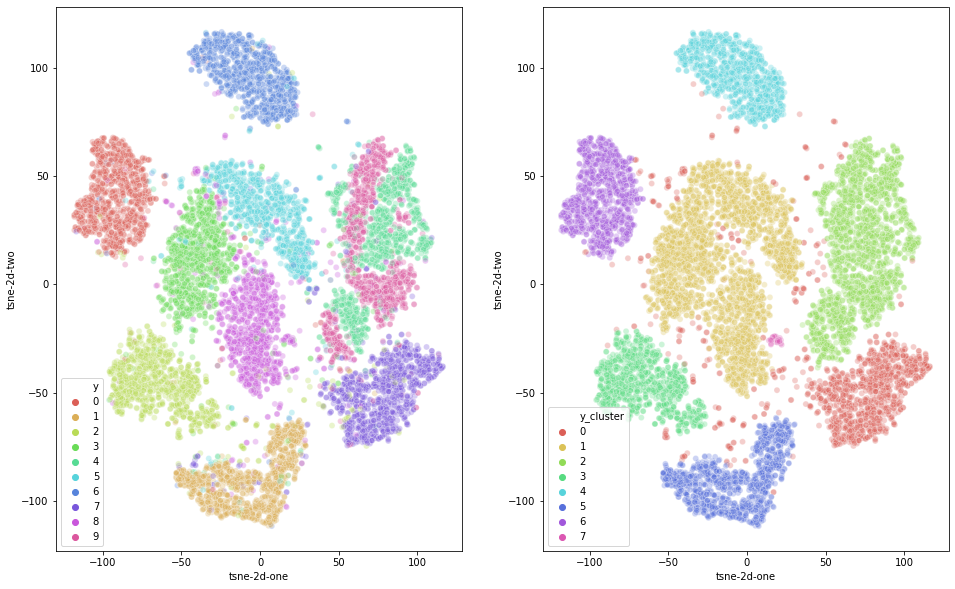

In [78]:
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y_cluster",
    palette=sns.color_palette("hls",n_clusters_),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# Ein Versuch zum Clustering mit kMeans

In [79]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, random_state=0)
km = km.fit(tsne_results)

In [80]:
labels_km = km.labels_
clusters_km = km.predict(tsne_results)
n_clusters_km = len(set(labels_km)) - (1 if -1 in labels_km else 0)
print ("Anzahl der Cluster in t-sne Daten mit KMeans: {}".format( n_clusters_km ) )

Anzahl der Cluster in t-sne Daten mit KMeans: 10


In [81]:
#
# Outliers werden auf 0 gesetzt (ist das sinnvoll?)
#
labels_km[labels_km < 0] = 0

In [82]:
#
# Ablegen der geschätzten Labels im Dataframe
#
df_subset['y_cluster_km'] = labels_km

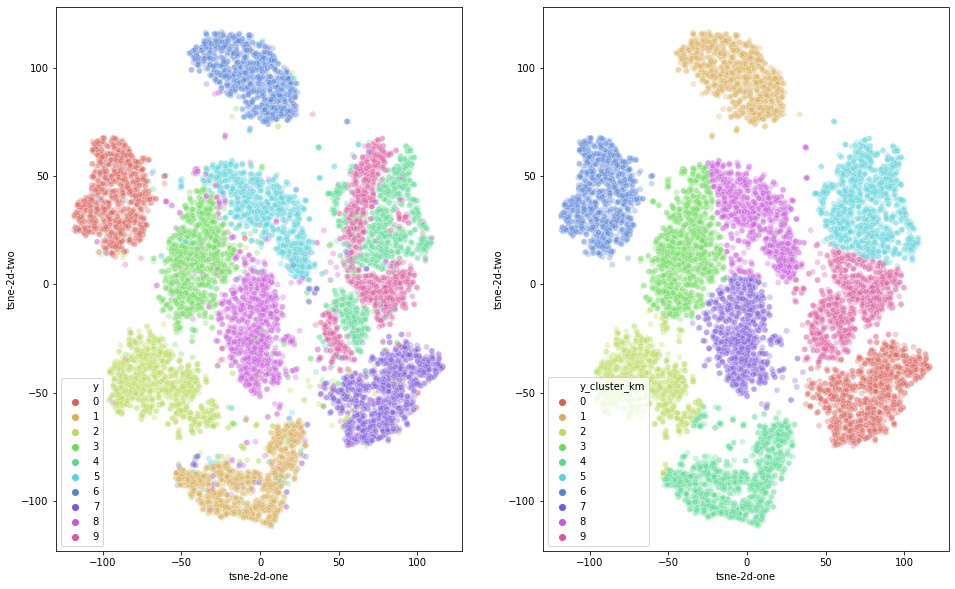

In [83]:
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y_cluster_km",
    palette=sns.color_palette("hls",n_clusters_km),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)